## Stock Price Velocity, Acceleration, Jerk and Snap? 
#### _Identifying Hidden Signals of Market Change with Optimized Multivariate-Multi Step MLPs, LSTMs and CNNs for Time Series Modeling of Higher Order Motion Derivatives in Physics and Their Relationship to Stock Price Dynamics_
Brian Griner and Thomas Ball

### Introduction
This is a collaborative work in progress to explore how concepts in the physical world like velocity, jerk and other higher order derivatives of motion used in physics might help us identify early signals of  marketplace activity that are eventually revealed in patterns of stock price change at different periods.
### Data
Daily prices for 2,600 stocks over a period of 11 months (225 days)
### Methodology
*   **MODELS:** Multivariate multi step sequence models (specifically Multi Layer Perceptrons, Long Short Term Memory networks and Convolutional Neural Networks) are developed on training and validation samples. 
*   **TUNING:** Model hyper parameters are optimized using a full factorial experimental design with 2 to 3 levels for each hyper parameter.  
Callbacks  are used for early stopping of training when the mean squared error of the validation sample does not improve over a specified number of training epochs. The _patience_ of the early stopping callback (number of completed epoches before training is terminated) is also tested as a hyper parameter in the experimental design.
*   **TESTING:** Model performance is tested using the Test sample after hyper parameter tuning.  The best model from the tuning phase is used to predict the stock price for a specific stock. Several performance metrics are calculated on the Mean Squared Error of the difference between the predicted and actual prices in the Test sample. (TOM TO ADD DETAILS ON METRICS HERE) 
### Results
TBD
### Insights & Discussion
TBD


**1. Load data from local device using colab import files upload method**

In [1]:
# import colab files method and upload data 
from google.colab import files
files.upload()

Saving stocks.txt to stocks.txt


### **Read Full Dataset - 2,600 tickers -- 225 days**

In [2]:
# LARGE DATASET - stocks.txt 

# import libs
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# set numeric format
pd.options.display.float_format = '{:,.2f}'.format

# create data objects 
stocks = pd.read_csv('stocks.txt',sep='\t',usecols=range(0,10))

# check columns & dtypes
print(stocks.columns)
print(stocks.info())

# format date to datetime.date
stocks['DATE'] =  pd.to_datetime(stocks.DATE.str.strip(' \t\r\n'),format='%d%b%y')

# format ticker id - strip leading & training spaces
stocks['TICKER'] = stocks['TICKER'].str.strip()

'''strip leading and trailing space example
df1['State'] = df1['State'].str.strip()
print (df1)'''

Index(['TICKER', 'DATE', 'TREND', 'RAWPRICE', 'LOGPRICE', 'RETURNS',
       'FIRST DERIVATIVE', 'SECOND DERIVATIVE', 'THIRD DERIVATIVE',
       'FOURTH DERIVATIVE'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598725 entries, 0 to 598724
Data columns (total 10 columns):
TICKER               598725 non-null object
DATE                 598725 non-null object
TREND                598725 non-null int64
RAWPRICE             598725 non-null float64
LOGPRICE             598725 non-null float64
RETURNS              598725 non-null float64
FIRST DERIVATIVE     598725 non-null float64
SECOND DERIVATIVE    598725 non-null float64
THIRD DERIVATIVE     598725 non-null float64
FOURTH DERIVATIVE    598725 non-null float64
dtypes: float64(7), int64(1), object(2)
memory usage: 45.7+ MB
None


"strip leading and trailing space example\ndf1['State'] = df1['State'].str.strip()\nprint (df1)"

### Data Dimensions: Overall

In [3]:
print(stocks.columns)
print(stocks.head())
print(stocks.tail())
print(stocks.describe().T)

# unique tickers 
utickers = stocks['TICKER'].unique()  # .tolist()
print(f'Number of tickers: {len(utickers)}')
# loop over unique tickers
'''
for t in utickers:
  print(t)'''

# unique dates 
udates = stocks['DATE'].unique()  # .tolist()
print(f'Number of dates: {len(udates)}')


Index(['TICKER', 'DATE', 'TREND', 'RAWPRICE', 'LOGPRICE', 'RETURNS',
       'FIRST DERIVATIVE', 'SECOND DERIVATIVE', 'THIRD DERIVATIVE',
       'FOURTH DERIVATIVE'],
      dtype='object')
  TICKER       DATE  ...  THIRD DERIVATIVE  FOURTH DERIVATIVE
0      A 2016-09-06  ...             -0.00               0.00
1      A 2016-09-07  ...              0.01               0.01
2      A 2016-09-08  ...             -0.01              -0.02
3      A 2016-09-09  ...             -0.04              -0.03
4      A 2016-09-12  ...              0.11               0.15

[5 rows x 10 columns]
       TICKER       DATE  ...  THIRD DERIVATIVE  FOURTH DERIVATIVE
598720   ZYNE 2017-07-21  ...              0.04               0.06
598721   ZYNE 2017-07-24  ...             -0.01              -0.06
598722   ZYNE 2017-07-25  ...             -0.07              -0.05
598723   ZYNE 2017-07-26  ...              0.13               0.20
598724   ZYNE 2017-07-27  ...             -0.10              -0.23

[5 rows x 10 c

## Check for natural groupings of ticker trends

### Reshape data for PCA and clustering

In [4]:
# import pandas DataFrame
from pandas import DataFrame

# reshape data from ticker-date level to ticker level with date in columns for log price
logprice_ticker_df = stocks[['TICKER','DATE','FIRST DERIVATIVE','SECOND DERIVATIVE','THIRD DERIVATIVE','FOURTH DERIVATIVE','LOGPRICE']]
print(logprice_ticker_df.columns)
print(logprice_ticker_df.shape)
print(logprice_ticker_df.head())
print(logprice_ticker_df.tail())
print(logprice_ticker_df.describe().T)
ticker_df = DataFrame(logprice_ticker_df['TICKER'].unique())
ticker_df.columns = ['TICKER']
print(f'Number of unique tickers: {len(ticker_df)}')
print(ticker_df.head(20))
print(ticker_df.tail(20))

Index(['TICKER', 'DATE', 'FIRST DERIVATIVE', 'SECOND DERIVATIVE',
       'THIRD DERIVATIVE', 'FOURTH DERIVATIVE', 'LOGPRICE'],
      dtype='object')
(598725, 7)
  TICKER       DATE  ...  FOURTH DERIVATIVE  LOGPRICE
0      A 2016-09-06  ...               0.00      3.87
1      A 2016-09-07  ...               0.01      3.87
2      A 2016-09-08  ...              -0.02      3.87
3      A 2016-09-09  ...              -0.03      3.83
4      A 2016-09-12  ...               0.15      3.84

[5 rows x 7 columns]
       TICKER       DATE  ...  FOURTH DERIVATIVE  LOGPRICE
598720   ZYNE 2017-07-21  ...               0.06      2.98
598721   ZYNE 2017-07-24  ...              -0.06      2.98
598722   ZYNE 2017-07-25  ...              -0.05      2.90
598723   ZYNE 2017-07-26  ...               0.20      2.89
598724   ZYNE 2017-07-27  ...              -0.23      2.85

[5 rows x 7 columns]
                       count  mean  std    min   25%   50%  75%   max
FIRST DERIVATIVE  598,725.00  0.00 0.04  -3.27 

In [5]:
# import libs
from scipy import stats

# reshape data from ticker-date level to ticker level
def ticker_trends(df,tcol,rlen,clen,tlen):
  # convert date from rows to columns
  df_t = df[tcol].to_numpy().reshape(rlen,clen)
  print(f'New dimensions of {tcol} trend data: {df_t.shape}')
  print(df_t[:5])
  # create training sample from first 200 columns
  df_train = df_t[:,:-tlen]
  # check shape of training data
  print(f'New dimensions of {tcol} train data: {df_train.shape}')
  print(f'Descriptive stats of {tcol} train data: ')
  print(stats.describe(df_train))
  return df_train

# create flattened trends for X and y training data
der1_t = ticker_trends(stocks,'FIRST DERIVATIVE', 2661, 225, 25)
der2_t = ticker_trends(stocks,'SECOND DERIVATIVE', 2661, 225, 25)
der3_t = ticker_trends(stocks,'THIRD DERIVATIVE', 2661, 225, 25)
der4_t = ticker_trends(stocks,'FOURTH DERIVATIVE', 2661, 225, 25)
lprice_t = ticker_trends(stocks,'LOGPRICE', 2661, 225, 25)

# merge trends
Xy_train = np.hstack((der1_t,der2_t,der3_t,der4_t,lprice_t))
print(f'new dimensions of Xy_t trend data: {Xy_train.shape}')

New dimensions of FIRST DERIVATIVE trend data: (2661, 225)
[[-0.00106437  0.00340209 -0.00191227 ... -0.01573286 -0.01363733
   0.00317644]
 [ 0.01170241  0.04729454  0.01536517 ... -0.01315159  0.00787246
  -0.01999865]
 [-0.02492472  0.0305585   0.0194721  ...  0.01400717 -0.0130001
   0.02190225]
 [-0.00572739  0.13115925  0.00852777 ...  0.01216048  0.02004566
  -0.00956363]
 [ 0.00985225  0.01080692 -0.01876913 ...  0.02034036  0.01330267
   0.03354534]]
New dimensions of FIRST DERIVATIVE train data: (2661, 200)
Descriptive stats of FIRST DERIVATIVE train data: 
DescribeResult(nobs=2661, minmax=(array([-0.13657553, -0.21070699, -0.33647224, -0.69314718, -0.2179125 ,
       -0.38223439, -0.18232156, -0.37046086, -1.866421  , -0.69059943,
       -0.35561991, -0.17004713, -0.13580154, -0.33050207, -0.38220825,
       -0.20975577, -0.55827978, -1.01030301, -0.33011567, -0.18871135,
       -0.49239122, -0.27155269, -0.68248957, -0.369747  , -0.12347833,
       -0.33864852, -0.23353977,

## Standardize data and run PCA

In [10]:
# import libs
# from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(Xy_train) 

# Normalizing the data so that 
# the data approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 

# Converting the numpy array into a pandas DataFrame 
#X_normalized = pd.DataFrame(X_scaled) 

pca = PCA(n_components = 0.99)  # , whiten=True) 
X_principal = pca.fit_transform(X_normalized) 
#X_principal = pd.DataFrame(X_principal) 
# X_principal.columns = ['P1', 'P2'] 
print(f'Original number of features: {X_normalized.shape[1]}')
#print(X_normalized.describe().T) 
print(f'Reduced number of features: {X_principal.shape[1]}')
#print(X_principal.describe().T) 

Original number of features: 1000
Reduced number of features: 183


## DBSCAN

### Dermine number of components using k-nearest neighbors

(2661,)
[0.03280486 0.03280486 0.08501193 0.08501193 0.11942232]
[1.19280736 1.20160597 1.20491755 1.20846089 1.21123903]


Text(0.5, 1.0, 'Sorted pairwise distances from KNN n neighbors = 2')

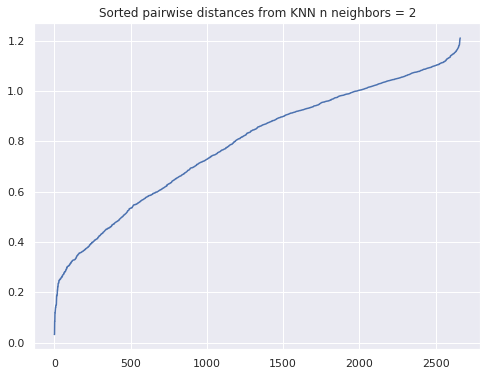

In [11]:
# determine eps for DBSCAN using KNN with k=2
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_principal)
distances, indices = nbrs.kneighbors(X_principal)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
print(distances.shape)
print(distances[:5])
print(distances[-5:])

#plt.figure(figsize=(4,3))
plt.figure(figsize=(8,6))
plt.plot(distances)
plt.title('Sorted pairwise distances from KNN n neighbors = 2')

### DBSCAN on scaled, normalized Principal Components

eps = 0.2, min_samples = 5
Unique Values :  [-1  0  1]
Occurrence Count :  [2650    6    5]
eps = 0.25, min_samples = 5
Unique Values :  [-1  0  1]
Occurrence Count :  [2647    7    7]
eps = 0.9, min_samples = 5
Unique Values :  [-1  0  1]
Occurrence Count :  [1274 1382    5]
eps = 1.1, min_samples = 5
Unique Values :  [-1  0]
Occurrence Count :  [ 226 2435]


'\n# parameter tuning\ndb = DBSCAN(eps = 0.25, min_samples = 5).fit(X_principal) \nlabels1 = db.labels_ \n\nprint(\'-\'*72)\nprint(\'eps = 0.25, min_samples = 5: \')\nuniqueValues1, occurCount1 = np.unique(labels1, return_counts=True)\nprint("Unique Values1 : " , uniqueValues1)\nprint("Occurrence Count1 : ", occurCount1)\nprint(\'=\'*72)\n\nplt.figure(figsize=(8,6))\nplt.scatter(X_principal[:, 0], X_principal[:, 1], c=labels1, s=40, cmap=\'viridis\')\nplt.title(\'DBSCAN with eps = 0.25\')'

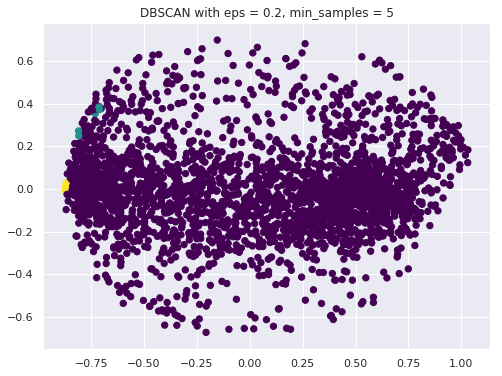

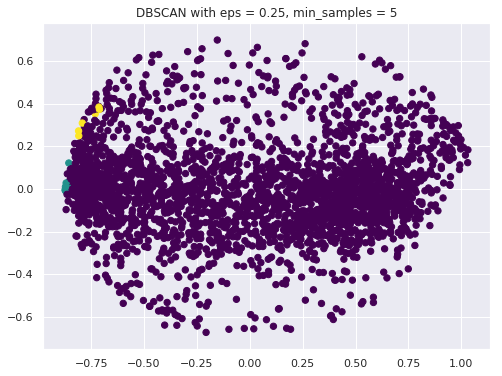

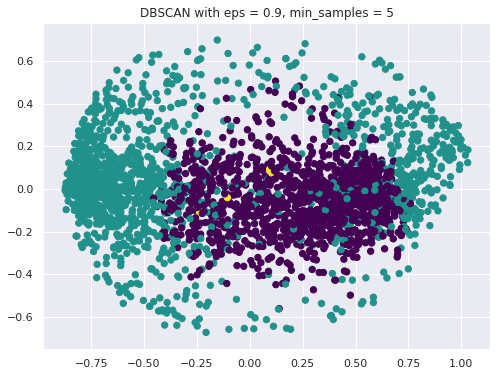

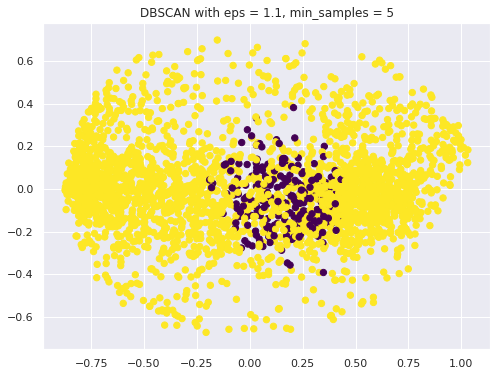

In [12]:
# import libs
from sklearn.cluster import DBSCAN

def dbscan(data, eps_val, min_samp):
  "Test DBSCAN with different values for eps and min samples."

  # Numpy array of all the cluster labels assigned to each data point 
  db_default = DBSCAN(eps = eps_val, min_samples = min_samp).fit(data) 
  labels = db_default.labels_ 

  print('='*72)
  print(f'eps = {eps_val}, min_samples = {min_samp}')
  uniqueValues, occurCount = np.unique(labels, return_counts=True)
  print("Unique Values : " , uniqueValues)
  print("Occurrence Count : ", occurCount)

  plt.figure(figsize=(8,6))
  plt.scatter(data[:, 0], data[:, 1], c=labels, s=40, cmap='viridis')
  plt.title(f'DBSCAN with eps = {eps_val}, min_samples = {min_samp}')
  return labels


if __name__ == '__main__':
  db_labels0 = dbscan(X_principal, 0.2, 5)
  db_labels1 = dbscan(X_principal, 0.25, 5)
  db_labels2 = dbscan(X_principal, 0.9, 5)
  db_labels3 = dbscan(X_principal, 1.1, 5)



## Gaussian Mixture Models

### Determine number of components using BIC and AIC

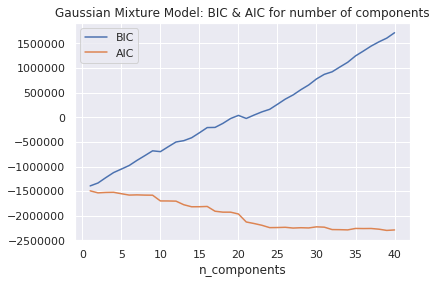

In [13]:
# mixture model libs
import itertools
from sklearn import mixture
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

# determine the number of components using BIC/AIC
def find_ncomponents(k):
  """Determine the optimal number of mixture components based on BIC & AIC."""
  n_components = np.arange(1, k)
  models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(X_principal) for n in n_components]

  # plot BIC and AIC
  plt.plot(n_components, [m.bic(X_principal) for m in models], label='BIC')
  plt.plot(n_components, [m.aic(X_principal) for m in models], label='AIC')
  plt.legend(loc='best')
  plt.xlabel('n_components')
  plt.title('Gaussian Mixture Model: BIC & AIC for number of components')


if __name__ == '__main__':
  find_ncomponents(41)

gmm n_components: 10
gmm weights_: [0.10747835 0.07703871 0.17587513 0.02893649 0.08154829 0.0864339
 0.0526118  0.03607666 0.17211552 0.18188515]
gmm means_: [[ 1.51266091e-01 -1.13560779e-02 -7.64745807e-02 ... -8.61848230e-04
  -7.98341835e-04 -6.93583260e-04]
 [-2.55192114e-01 -3.27122372e-02 -2.54287204e-02 ...  2.02915984e-03
  -1.70107816e-03  9.81856709e-04]
 [ 6.73532439e-01  1.30119839e-01 -4.47961334e-02 ... -5.18412268e-04
  -5.65704626e-04 -7.25799264e-04]
 ...
 [-8.99842611e-02  4.73527500e-01 -7.32897987e-02 ... -1.16081131e-03
   3.53434540e-03 -1.74554408e-03]
 [-7.10248030e-01 -3.84655365e-02  7.92211291e-03 ... -9.03041186e-04
   1.83614309e-04 -6.02580641e-04]
 [ 4.39903075e-01 -1.24023005e-01  1.48857423e-02 ...  8.24445995e-04
   1.67207801e-03  1.19162243e-03]]
Probability of membership: 
[[0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
DescribeResult(nobs=2

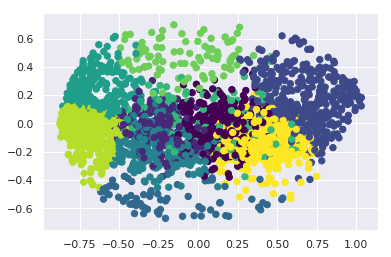

gmm n_components: 14
gmm weights_: [0.08455468 0.04359263 0.06914694 0.03006389 0.04246524 0.06275836
 0.04396843 0.03231868 0.04547163 0.08868846 0.04960541 0.14919203
 0.0255543  0.23261932]
gmm means_: [[ 2.49743703e-01  4.02913850e-02 -7.82706934e-02 ...  2.18441152e-03
   6.77495051e-04 -1.21080296e-03]
 [ 1.64721803e-01 -1.74034882e-01  4.68368865e-02 ... -7.78688637e-04
   1.33516146e-03 -1.60248891e-03]
 [ 7.32434953e-01  2.44735872e-01 -1.67468737e-01 ... -6.23166840e-04
  -9.84726877e-04 -7.15312118e-04]
 ...
 [ 6.18068966e-01 -5.09795328e-02  2.19347649e-03 ... -8.35631639e-04
  -1.12895569e-03  6.15137038e-04]
 [ 5.19757843e-01  2.92865039e-01  2.50011961e-01 ... -1.43833325e-03
  -9.02857613e-04  2.88893279e-03]
 [-6.98697735e-01  5.22264813e-02 -5.68456226e-03 ... -7.85366391e-04
  -2.82663695e-04 -6.01548936e-04]]
Probability of membership: 
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 

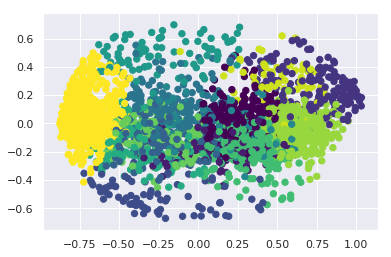

gmm n_components: 16
gmm weights_: [0.06163097 0.0529876  0.07027433 0.02893649 0.03194288 0.05712138
 0.04509583 0.03194288 0.04396843 0.04472003 0.04847802 0.14919203
 0.0266817  0.18902668 0.0792935  0.03870725]
gmm means_: [[ 2.43518981e-01  3.53254378e-02 -1.06075996e-01 ...  1.35404934e-04
  -4.73536920e-05  1.32097978e-05]
 [-5.27269506e-01 -1.19995633e-02  4.02252497e-03 ... -7.04354559e-04
   1.26158038e-03  2.29727396e-05]
 [ 7.28632278e-01  2.47408493e-01 -1.61121468e-01 ... -1.35508901e-03
  -9.52789163e-04 -1.63720802e-03]
 ...
 [-7.26063348e-01  6.54737807e-02 -6.32879622e-03 ... -9.56057359e-04
  -6.69283054e-04 -3.62933380e-04]
 [ 2.37773697e-01 -8.52764497e-02  1.62127370e-02 ...  1.37910876e-03
   1.02878429e-03 -5.57622892e-04]
 [ 1.94023540e-01 -1.82435154e-01  5.12948511e-02 ...  7.37601907e-04
   7.35490086e-04 -1.39487198e-03]]
Probability of membership: 
[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0.

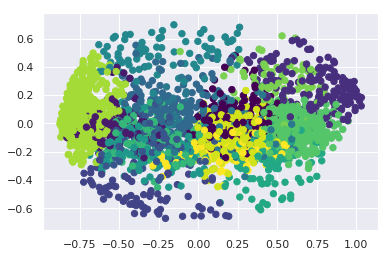

gmm n_components: 21
gmm weights_: [0.02292371 0.05712138 0.03645246 0.05110861 0.06388576 0.13829387
 0.05524239 0.03908305 0.02142052 0.03269448 0.02029312 0.03419767
 0.03983465 0.02329951 0.04096204 0.0526118  0.1589628  0.02179632
 0.03645246 0.0259301  0.0274333 ]
gmm means_: [[ 1.49662045e-01 -1.58423985e-03  3.70008096e-02 ... -3.90202656e-03
  -2.07597858e-03 -4.91002298e-03]
 [-2.06770873e-01 -2.43115908e-02 -1.10363151e-01 ...  5.01376108e-04
  -1.25258277e-03  3.11229212e-03]
 [ 5.85676829e-01 -1.29292200e-02  2.16375984e-01 ...  1.31790295e-05
  -1.76291986e-03  2.82629665e-03]
 ...
 [ 2.41221912e-01 -1.99356852e-01  8.18136724e-02 ...  7.10835481e-03
   2.67766667e-03 -3.41897248e-03]
 [-4.07687017e-01 -4.83282644e-01 -1.79677193e-01 ... -9.09745582e-04
   4.17745246e-03 -3.69698999e-04]
 [-2.13040688e-01  8.58381569e-02  4.30704050e-01 ... -1.27620494e-03
   2.77603816e-03  5.14918377e-03]]
Probability of membership: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0

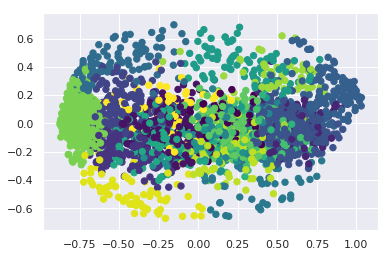

gmm n_components: 34
gmm weights_: [0.00977076 0.03945885 0.03344607 0.06463735 0.04171364 0.08568207
 0.0514844  0.01878993 0.03194288 0.02442691 0.01803833 0.0263059
 0.02893649 0.01390455 0.00676437 0.01991732 0.12213454 0.01540774
 0.01390455 0.02405111 0.02405111 0.01277715 0.00977076 0.00751597
 0.03570086 0.02179632 0.02254791 0.03344607 0.02329951 0.04810222
 0.00864337 0.02329951 0.01540774 0.02292371]
gmm means_: [[ 1.96404508e-02  3.32567719e-02  2.66033711e-02 ...  7.28951184e-03
  -3.12835315e-04 -3.70216102e-03]
 [-2.82976480e-01  2.32680022e-02 -1.15886805e-01 ... -1.40338442e-03
   1.29058040e-03  5.97874355e-04]
 [ 5.75709108e-01  4.55648059e-02  1.52399486e-01 ...  2.17097000e-03
  -3.29222148e-03  1.11431818e-03]
 ...
 [ 3.62919703e-01 -1.43166406e-01  4.79676334e-02 ... -3.71295777e-04
   2.23156580e-03 -4.27586101e-04]
 [ 2.50358901e-01  4.54929874e-01 -1.03650719e-01 ...  3.08399483e-03
   5.48992273e-03 -2.21012884e-03]
 [-3.30937567e-01 -5.00380477e-02 -8.320104

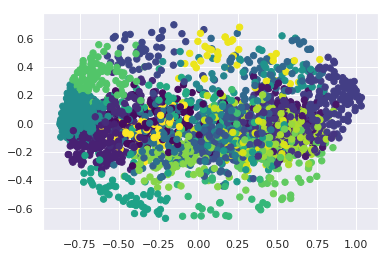

In [14]:
# mixture models based on BIC/AIC inflection points: 10, 14, 16, 21, 34 components
import itertools
from sklearn import mixture

# Fit a Gaussian mixture with EM
def GMM(X,ncomponents=2,threshold=0.999):
  """Fit a Gaussian Mixture Model with ncomponents.
  Predict posterior distribution of component members.
  Print prior probs and means for components.
  Print descriptive statistics for components.
  Return posterior probs of membership."""

  gmm = mixture.GaussianMixture(n_components=ncomponents, covariance_type='full', random_state=123456).fit(X)
  labels = gmm.predict(X)
  probs = gmm.predict_proba(X)
  print(f'gmm n_components: {gmm.n_components}')
  print(f'gmm weights_: {gmm.weights_}')
  print(f'gmm means_: {gmm.means_}')
  # print(f'gmm covariances_: {gmm.covariances_}')
  print('Probability of membership: ')
  print(probs[:-1].round(3))
  # print(probs[:15].round(3))
  print(stats.describe(probs))
  print(f'Number of tickers with prob > {threshold} in any of the {ncomponents} component: {(probs > threshold).sum():,} ({(probs > threshold).sum()/len(probs):.1%})')
  #print(gmm.__dict__)
  plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
  plt.show();
  return probs


if __name__ == '__main__':
  # set parameters
  thrsh = 0.999
  ncomp_lst = [10, 14, 16, 21, 34]
  # gmix = GMM(X_principal,ncomponents=n,threshold=thrsh)

  # test different numbers of components
  [GMM(X_principal,ncomponents=n,threshold=thrsh) for n in ncomp_lst]


### Bayesian Gaussian Mixture with a Dirichlet process prior

dpgmm n_components: 10
dpgmm weights_: [0.10743794 0.07735285 0.17602643 0.02925828 0.08172288 0.08578563
 0.05277529 0.03627157 0.17220122 0.1811679 ]
dpgmm means_: [[ 1.50280348e-01 -1.08922623e-02 -7.61386539e-02 ... -8.54061102e-04
  -7.40161388e-04 -6.64481630e-04]
 [-2.53953317e-01 -3.25534399e-02 -2.53052800e-02 ...  2.01930955e-03
  -1.69282050e-03  9.77090414e-04]
 [ 6.72095350e-01  1.29849210e-01 -4.46984043e-02 ... -5.16935155e-04
  -5.64222166e-04 -7.24640926e-04]
 ...
 [-8.90565883e-02  4.68645773e-01 -7.25342338e-02 ... -1.14884418e-03
   3.49790885e-03 -1.72754878e-03]
 [-7.09093924e-01 -3.76215844e-02  7.66902745e-03 ... -9.12494589e-04
   1.98990868e-04 -6.31689873e-04]
 [ 4.38677712e-01 -1.23787907e-01  1.46236702e-02 ...  8.16089622e-04
   1.63065566e-03  1.16993683e-03]]
Probability of membership: 
[[0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
DescribeResult

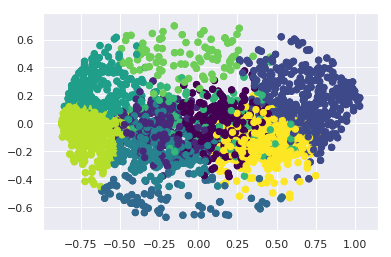

dpgmm n_components: 14
dpgmm weights_: [0.08489855 0.04393387 0.06943816 0.03038843 0.0427481  0.0629648
 0.04420039 0.03256879 0.04564217 0.0886045  0.04968235 0.14853647
 0.02571387 0.23067956]
dpgmm means_: [[ 2.48638643e-01  4.01131045e-02 -7.79243629e-02 ...  2.17474598e-03
   6.74497286e-04 -1.20544542e-03]
 [ 1.63313925e-01 -1.72547405e-01  4.64365713e-02 ... -7.72033179e-04
   1.32374982e-03 -1.58879243e-03]
 [ 7.28475845e-01  2.43412975e-01 -1.66563500e-01 ... -6.19798371e-04
  -9.79404029e-04 -7.11445566e-04]
 ...
 [ 6.16516029e-01 -5.08514435e-02  2.18796524e-03 ... -8.33532062e-04
  -1.12611911e-03  6.13591467e-04]
 [ 5.12225120e-01  2.88620618e-01  2.46388599e-01 ... -1.41748784e-03
  -8.89772720e-04  2.84706420e-03]
 [-6.97570803e-01  5.21422450e-02 -5.67539361e-03 ... -7.84099671e-04
  -2.82207786e-04 -6.00578696e-04]]
Probability of membership: 
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 

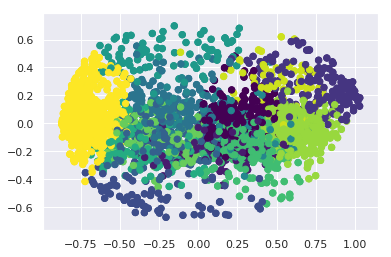

dpgmm n_components: 16
dpgmm weights_: [0.06198344 0.05332197 0.07056533 0.02926362 0.0322496  0.05734571
 0.0453274  0.03219761 0.04415136 0.04487042 0.04857527 0.14859943
 0.02685207 0.18773474 0.07871714 0.03824487]
dpgmm means_: [[ 2.42043108e-01  3.51113442e-02 -1.05433111e-01 ...  1.34584298e-04
  -4.70666999e-05  1.31297384e-05]
 [-5.23556340e-01 -1.19150593e-02  3.99419733e-03 ... -6.99394315e-04
   1.25269601e-03  2.28109597e-05]
 [ 7.24756575e-01  2.46092490e-01 -1.60264439e-01 ... -1.34788109e-03
  -9.47721135e-04 -1.62849947e-03]
 ...
 [-7.24622746e-01  6.53438724e-02 -6.31623909e-03 ... -9.54160420e-04
  -6.67955112e-04 -3.62213274e-04]
 [ 2.36652123e-01 -8.48742023e-02  1.61362618e-02 ...  1.37260353e-03
   1.02393153e-03 -5.54992595e-04]
 [ 1.92157929e-01 -1.80680970e-01  5.08016314e-02 ...  7.30509581e-04
   7.28418066e-04 -1.38145975e-03]]
Probability of membership: 
[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.

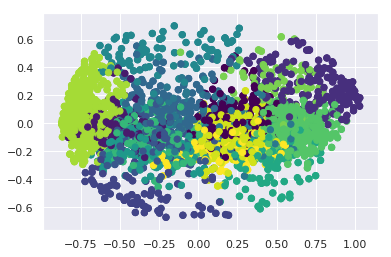

dpgmm n_components: 21
dpgmm weights_: [0.02329074 0.05745344 0.03678522 0.05140237 0.06413021 0.13831861
 0.05544432 0.03930981 0.02169877 0.03289825 0.02054538 0.03433885
 0.03990249 0.02347122 0.04093925 0.05241573 0.15740034 0.02182892
 0.03610716 0.02561053 0.02670836]
dpgmm means_: [[ 1.47248141e-01 -1.55868760e-03  3.64040224e-02 ... -3.83909065e-03
  -2.04249506e-03 -4.83082906e-03]
 [-2.05419430e-01 -2.41526915e-02 -1.09641823e-01 ...  4.98099140e-04
  -1.24439595e-03  3.09195034e-03]
 [ 5.79700535e-01 -1.27972892e-02  2.14168066e-01 ...  1.30445496e-05
  -1.74493089e-03  2.79745689e-03]
 ...
 [ 2.38760464e-01 -1.97322599e-01  8.09788390e-02 ...  7.03582057e-03
   2.65034354e-03 -3.38408500e-03]
 [-4.01862917e-01 -4.76378607e-01 -1.77110376e-01 ... -8.96749216e-04
   4.11777457e-03 -3.64417585e-04]
 [-2.10161760e-01  8.46781819e-02  4.24883725e-01 ... -1.25895892e-03
   2.73852414e-03  5.07960021e-03]]
Probability of membership: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0

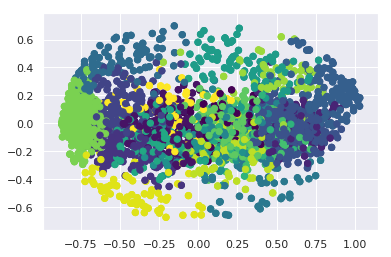

dpgmm n_components: 34
dpgmm weights_: [0.01014274 0.03980455 0.03378296 0.06491177 0.04200529 0.08584604
 0.05170576 0.019098   0.032186   0.024686   0.01831599 0.02652232
 0.02911746 0.01417529 0.00708244 0.02011407 0.12021872 0.01561602
 0.01411356 0.02411452 0.02408536 0.01295204 0.00997787 0.00774953
 0.03648    0.02170345 0.02239658 0.03297338 0.02302031 0.04698767
 0.0086954  0.02268711 0.01497794 0.02175385]
dpgmm means_: [[ 1.89130267e-02  3.20250396e-02  2.56180611e-02 ...  7.01952992e-03
  -3.01248822e-04 -3.56504395e-03]
 [-2.80306890e-01  2.30484928e-02 -1.14793534e-01 ... -1.39014494e-03
   1.27840511e-03  5.92234031e-04]
 [ 5.69312340e-01  4.50585303e-02  1.50706158e-01 ...  2.14684811e-03
  -3.25564125e-03  1.10193687e-03]
 ...
 [ 3.57159073e-01 -1.40893924e-01  4.72062424e-02 ... -3.65402194e-04
   2.19614412e-03 -4.20799020e-04]
 [ 2.44397975e-01  4.44098210e-01 -1.01182845e-01 ...  3.01056638e-03
   5.35921028e-03 -2.15750673e-03]
 [-3.25599865e-01 -4.92309825e-02 -8

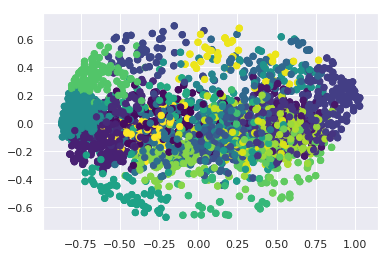

In [15]:
from sklearn.mixture import BayesianGaussianMixture

# Fit a Dirichlet process Gaussian mixture using five components

def BayesGMM(X,ncomponents=2,threshold=0.999):
  """Fit Bayesian Gaussian Mixture Model with Dirichlet Prior.
  Plot results.
  Print number of components, priors, means, covariances."""

  dpgmm = mixture.BayesianGaussianMixture(n_components=ncomponents, covariance_type='full', random_state=123456).fit(X)
  labels1 = dpgmm.predict(X)
  probs = dpgmm.predict_proba(X)
  plt.scatter(X[:, 0], X[:, 1], c=labels1, s=40, cmap='viridis');

  #plot_results(X, dpgmm.predict(X), dpgmm.means_, dpgmm.covariances_, 1, 'Bayesian Gaussian Mixture with a Dirichlet process prior')
  print(f'dpgmm n_components: {dpgmm.n_components}')
  print(f'dpgmm weights_: {dpgmm.weights_}')
  print(f'dpgmm means_: {dpgmm.means_}')
  # print(f'dpgmm covariances_: {dpgmm.covariances_}')
  print('Probability of membership: ')
  print(probs[:-1].round(3))
  print(stats.describe(probs))
  print(f'Number of tickers with prob > {threshold} in any of the {ncomponents} component: {(probs > threshold).sum():,} ({(probs > threshold).sum()/len(probs):.1%})')
  #print(dpgmm.__dict__)
  plt.scatter(X[:, 0], X[:, 1], c=labels1, s=40, cmap='viridis')
  plt.show();
  return probs


if __name__ == '__main__':
  # set parameters
  thrsh = 0.999
  ncomp_lst = [10, 14, 16, 21, 34]

  # test different numbers of components
  [BayesGMM(X_principal,ncomponents=n,threshold=thrsh) for n in ncomp_lst]


### STOP HERE - 10/1/19 
1. *NEED TO FIND A BETTER WAY TO CREATE AND PLOT COMPONENT MEANS*
2. *ADD CODE FOR CLASSIFIERS (TREE, GBM)*
3. *SELECT # COMPONENTS BASED ON PREDICTION OF CLASSIFIERS*

In [0]:
# create component labels
'''
lst = range(11)
["{:02d}".format(x) for x in lst]
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10']'''

# set number of components
ncomp = 29
# format numbers to strings
clst = ['{:02d}'.format(k) for k in range(ncomp)]
# concatonate prefix to num str
clabels = ['cl' + c for c in clst]
# insert ticker as 1st element in list
clabels.insert(0,'TICKER')
print(clabels)


['TICKER', 'cl00', 'cl01', 'cl02', 'cl03', 'cl04', 'cl05', 'cl06', 'cl07', 'cl08', 'cl09', 'cl10', 'cl11', 'cl12', 'cl13', 'cl14', 'cl15', 'cl16', 'cl17', 'cl18', 'cl19', 'cl20', 'cl21', 'cl22', 'cl23', 'cl24', 'cl25', 'cl26', 'cl27', 'cl28']


### Use K component Gaussian Mixture to segment tickers

### Merge component labels with stock trends data



(2661, 225)
(2661, 2)
(2661, 227)
  TICKER component_label    0    1    2    3  ...  219  220  221  222  223  224
0      A             cl1 3.87 3.87 3.87 3.83  ... 4.13 4.13 4.14 4.12 4.11 4.11
1    AAL             cl0 3.64 3.68 3.70 3.68  ... 3.98 3.97 3.96 3.94 3.95 3.93
2    AAN             cl4 3.23 3.26 3.27 3.25  ... 3.70 3.71 3.71 3.72 3.71 3.73
3   AAOI             cl4 2.91 3.04 3.05 3.03  ... 4.50 4.51 4.57 4.58 4.60 4.59
4    AAP             cl1 5.08 5.09 5.07 5.04  ... 4.65 4.67 4.65 4.67 4.68 4.71

[5 rows x 227 columns]
(6, 225)
                 0    1    2    3    4    5    ...  219  220  221  222  223  224
component_label                                ...                              
cl0             3.69 3.69 3.69 3.66 3.67 3.65  ... 3.80 3.79 3.80 3.80 3.80 3.79
cl1             4.40 4.40 4.40 4.37 4.39 4.37  ... 4.53 4.53 4.53 4.53 4.53 4.52
cl2             2.33 2.34 2.34 2.31 2.32 2.30  ... 2.32 2.32 2.32 2.32 2.32 2.31
cl3             1.66 1.66 1.67 1.64 1.65 1.63  .

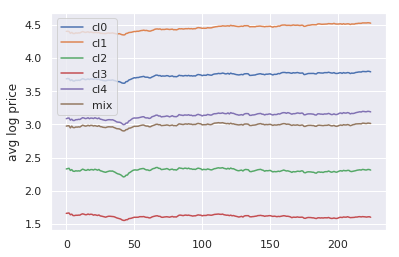

In [0]:
#  
trends_df = pd.DataFrame(Xy_t)
print(trends_df.shape)
ticker_clabel_df = ticker_probs_df[['TICKER','component_label']]
print(ticker_clabel_df.shape)  # [['TICKER','component_label']])
ticker_clabel_trends_df = pd.concat((ticker_clabel_df, trends_df), axis=1)
# print(ticker_clabel_trends_df.index)
print(ticker_clabel_trends_df.shape)
print(ticker_clabel_trends_df.head())
# print((ticker_clabel_trends_df['component_label'] == 'mix'))

### THIS IS WRONG - NO MEAN FOR MIX???
# calculate component means
stocks_5comp_mean = ticker_clabel_trends_df.groupby(['component_label'], as_index=True).mean()
# stocks_5comp_mean = stocks_5comp.mean()
# print(stocks_5comp_mean.index)
print(stocks_5comp_mean.shape)
print(stocks_5comp_mean)

# transpose for plot 
clabel6_lprice = stocks_5comp_mean.T
print(clabel6_lprice.shape)
print(clabel6_lprice.head())
print(clabel6_lprice.describe())

# plot component avg log prices
plt.plot(clabel6_lprice['cl0'],label='cl0')
plt.plot(clabel6_lprice['cl1'],label='cl1') 
plt.plot(clabel6_lprice['cl2'],label='cl2')
plt.plot(clabel6_lprice['cl3'],label='cl3') 
plt.plot(clabel6_lprice['cl4'],label='cl4')
plt.plot(clabel6_lprice['mix'],label='mix')
plt.ylabel('avg log price')
plt.legend(loc='best')
plt.show()


## STOPPED HERE 9/30/19

        LOGPRICE  RETURNS  ...  THIRD DERIVATIVE  FOURTH DERIVATIVE
TICKER                     ...                                     
A           3.95     0.00  ...              0.00               0.00
AAL         3.82     0.00  ...             -0.00              -0.00
AAN         3.46     0.00  ...              0.00               0.00
AAOI        3.65     0.01  ...             -0.00              -0.00
AAP         4.99    -0.00  ...              0.00               0.00

[5 rows x 6 columns]
        LOGPRICE  RETURNS  ...  THIRD DERIVATIVE  FOURTH DERIVATIVE
TICKER                     ...                                     
ZOES        3.01    -0.00  ...             -0.00               0.00
ZSAN        0.79     0.00  ...             -0.00              -0.00
ZTS         4.02     0.00  ...             -0.00              -0.00
ZUMZ        2.96    -0.00  ...             -0.00              -0.00
ZYNE        2.88     0.00  ...             -0.00              -0.00

[5 rows x 6 columns]
    

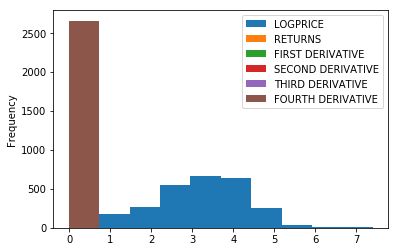

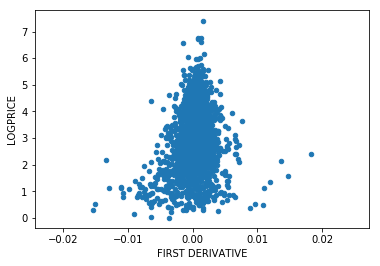

In [0]:
# groupby ticker rawprice returns
ticker_means = stocks.groupby('TICKER')['LOGPRICE','RETURNS','FIRST DERIVATIVE','SECOND DERIVATIVE','THIRD DERIVATIVE','FOURTH DERIVATIVE'].mean()
print(ticker_means.head())
print(ticker_means.tail())
print(ticker_means.describe().T)

#ticker_means.LOGPRICE.plot.hist();

ticker_means.plot.hist();

ticker_means.plot.scatter(y='LOGPRICE',x='FIRST DERIVATIVE');

        LOGPRICE  RETURNS  POS_RETURNS
TICKER                                
A           3.95     0.00            1
AAL         3.85     0.00            1
AAN         3.44     0.00            1
AAOI        3.61     0.00            1
AAP         5.00    -0.00            0
        LOGPRICE  RETURNS  POS_RETURNS
TICKER                                
ZOES        3.11    -0.00            0
ZSAN        0.83    -0.00            0
ZTS         4.00     0.00            1
ZUMZ        2.96     0.00            0
ZYNE        2.95    -0.00            0
               count  mean  std   min  25%  50%  75%  max
LOGPRICE    2,661.00  3.18 1.12  0.01 2.49 3.28 4.00 7.40
RETURNS     2,661.00  0.00 0.00 -0.02 0.00 0.00 0.00 0.01
POS_RETURNS 2,661.00  0.52 0.50  0.00 0.00 1.00 1.00 1.00


<Figure size 432x288 with 0 Axes>

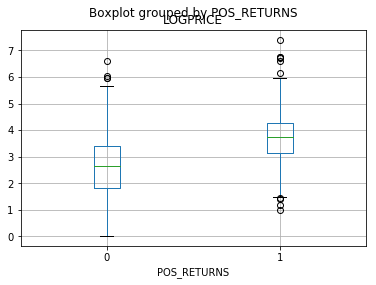

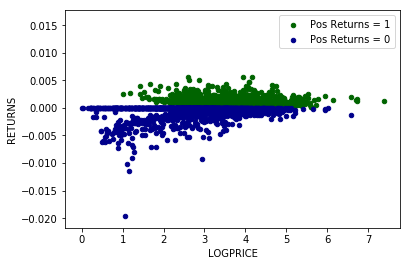

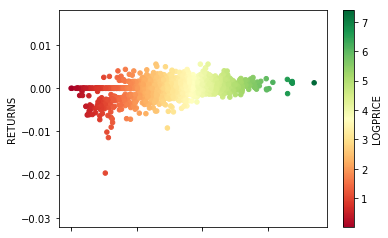

In [0]:
# groupby ticker rawprice returns
ticker_median = stocks.groupby('TICKER')['LOGPRICE','RETURNS'].median()
ticker_median['POS_RETURNS'] = np.where(ticker_median['RETURNS']>0,1,0)
print(ticker_median.head())
print(ticker_median.tail())
print(ticker_median.describe().T)

#plt.figure();

#ticker_median[ticker_median['LOGPRICE','POS_RETURNS']].plot.hist(by='POS_RETURNS',alpha=0.5)  # by='POS_RETURNS',figsize=(1,2))
#ticker_median.RETURNS.plot.hist();

plt.figure();
ticker_median.boxplot(column='LOGPRICE', by='POS_RETURNS')  # x='LOGPRICE',y='RETURNS');

ax = ticker_median[ticker_median.POS_RETURNS>0].plot.scatter(x='LOGPRICE',y='RETURNS',color='DarkGreen',label='Pos Returns = 1');
ticker_median[ticker_median.POS_RETURNS<=0].plot.scatter(x='LOGPRICE',y='RETURNS',color='DarkBlue',label='Pos Returns = 0',ax=ax);

ticker_median.plot.scatter(x='LOGPRICE',y='RETURNS',c='LOGPRICE',cmap='RdYlGn');

        LOGPRICE  RETURNS  ...  THIRD DERIVATIVE  FOURTH DERIVATIVE
TICKER                     ...                                     
A           3.95     0.00  ...              0.00               0.00
AAL         3.82     0.00  ...             -0.00              -0.00
AAN         3.46     0.00  ...              0.00               0.00
AAOI        3.65     0.01  ...             -0.00              -0.00
AAP         4.99    -0.00  ...              0.00               0.00

[5 rows x 6 columns]
        LOGPRICE  RETURNS  ...  THIRD DERIVATIVE  FOURTH DERIVATIVE
TICKER                     ...                                     
ZOES        3.01    -0.00  ...             -0.00               0.00
ZSAN        0.79     0.00  ...             -0.00              -0.00
ZTS         4.02     0.00  ...             -0.00              -0.00
ZUMZ        2.96    -0.00  ...             -0.00              -0.00
ZYNE        2.88     0.00  ...             -0.00              -0.00

[5 rows x 6 columns]
    

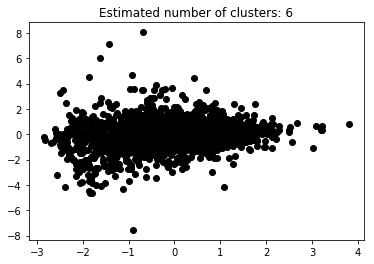

In [0]:
# cluster tickers by log price and returns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import DBSCAN
from scipy import stats

# groupby ticker logprice, returns, derivatives
ticker_means = stocks.groupby('TICKER')['LOGPRICE','RETURNS','FIRST DERIVATIVE','SECOND DERIVATIVE','THIRD DERIVATIVE','FOURTH DERIVATIVE'].mean()
print(ticker_means.head())
print(ticker_means.tail())
print(ticker_means.describe().T)

# standardize features
scaler = StandardScaler()
ticker_std = scaler.fit_transform(ticker_means)

# create meanshift object?
'''
dbscan = DBSCAN(n_jobs=-1)
clusters = dbscan.fit_predict(ticker_std)
stats.describe(clusters)
'''

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit_predict(ticker_std)
db.__dir__

'''
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

labels = db.labels_
print('cluster labels', labels)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
'''
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
'''
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
'''
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(ticker_std, labels))


# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = ticker_std[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = ticker_std[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [0]:
# groupby ticker rawprice returns
ticker_ = stocks.groupby('TICKER')['RAWPRICE','RETURNS'].mean()
ticker_means = stocks.groupby('TICKER')['RAWPRICE','RETURNS'].mean()
ticker_means = stocks.groupby('TICKER')['RAWPRICE','RETURNS'].mean()
ticker_means = stocks.groupby('TICKER')['RAWPRICE','RETURNS'].mean()
print(ticker_means.head())
print(ticker_means.tail())
print(ticker_means.describe().T)

ticker_means.RAWPRICE.plot.hist();
ticker_means.RETURNS.plot.hist();

ticker_means.plot.scatter(x='RAWPRICE',y='RETURNS');